In [49]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py

In [50]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.ones((L, K))
    
    for k in range(L):
        j, m = k, k
        for i in range(j, K+m):
            X[k, i - j] = F[i]

    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T, U)
    
    return (A, U, V)

In [51]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд
A, U, V = SSA_modes(ts, 3) # его разложение с длиной окна = 3
print(A) # собственные числа
print(U) # собственные вектора
print(V) # траекторные вектора

[129.66842566  12.           3.33157434]
[[-5.78869570e-01  7.07106781e-01  4.06091149e-01]
 [-5.74299610e-01  7.09966662e-16 -8.18645196e-01]
 [-5.78869570e-01 -7.07106781e-01  4.06091149e-01]]
[[-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  1.11022302e-15 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  1.11022302e-15 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]]


In [83]:
def SSA_group(A, U, V, N, I):
    L = len(A)
    V = V.transpose()
    K = N - L + 1
    
    Z = np.dot(U[:, I], V[I, :])

    G = np.zeros(N)
    L_min = min(L, K)
    K_max = max(L, K)
    lv = []
    
    for k in range(0, L_min - 1):
        s = 0
        for i in range(k+1):
            s += Z[i, k - i]
        lv.append(round(s/(k+1), 1))

    for k in range(L_min - 1, K_max):
        s = 0
        
        for i in range(L_min - 1 + 1):
            s += Z[i, k - i]
        lv.append(round(s/(L_min), 1))

    for k in range(K_max, N):
        s = 0

        for i in range(k - K_max + 1, N - K_max + 1):
            s += Z[i, k - i]
        lv.append(round(s/(N - k), 1))

    return lv

[3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0]


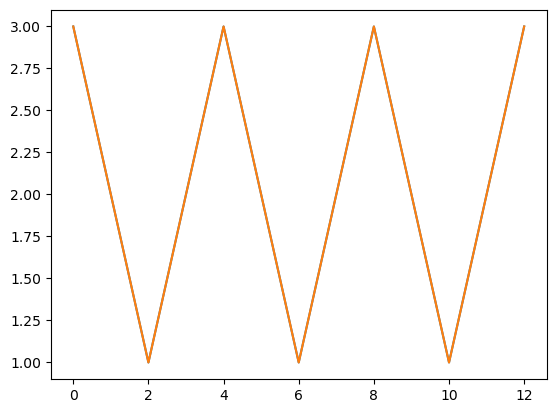

In [90]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1, 2])
print(ts1)
plt.plot(ts)
plt.plot(ts1)

[2.0, 1.8, 1.9, 2.0, 2.1, 2.0, 1.9, 2.0, 2.1, 2.0, 1.9, 1.8, 2.0]


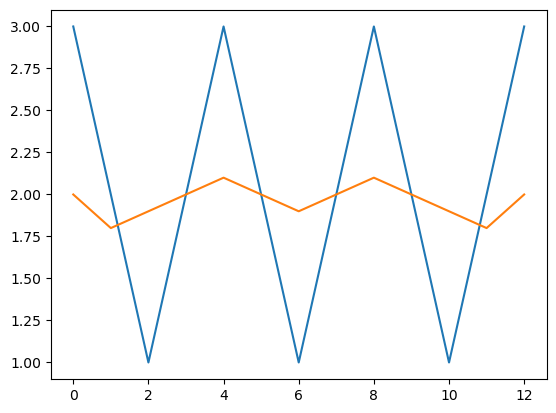

[1.0, 0.0, -0.7, 0.0, 0.7, -0.0, -0.7, 0.0, 0.7, -0.0, -0.7, -0.0, 1.0]


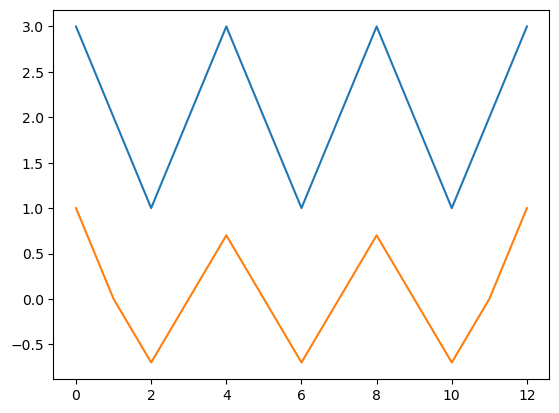

[-0.0, 0.2, -0.2, 0.0, 0.2, 0.0, -0.2, 0.0, 0.2, 0.0, -0.2, 0.2, -0.0]


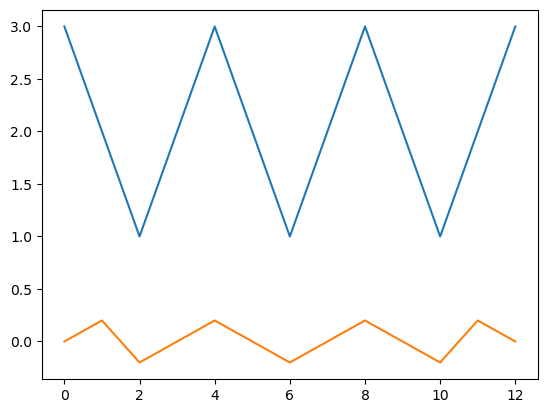

In [92]:
ts1 = SSA_group(A, U, V, len(ts), [0])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()
ts1 = SSA_group(A, U, V, len(ts), [1])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()
ts1 = SSA_group(A, U, V, len(ts), [2])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()

[3.0, 1.8, 1.2, 2.0, 2.8, 2.0, 1.2, 2.0, 2.8, 2.0, 1.2, 1.8, 3.0]


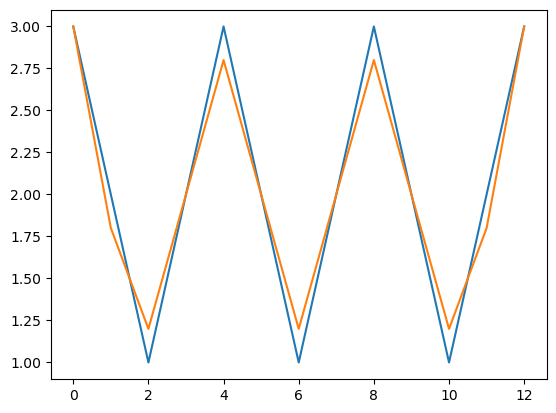

[2.0, 2.0, 1.7, 2.0, 2.3, 2.0, 1.7, 2.0, 2.3, 2.0, 1.7, 2.0, 2.0]


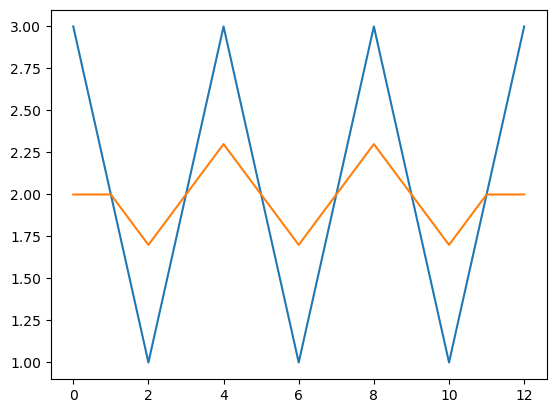

[1.0, 0.2, -0.9, 0.0, 0.9, 0.0, -0.9, 0.0, 0.9, 0.0, -0.9, 0.2, 1.0]


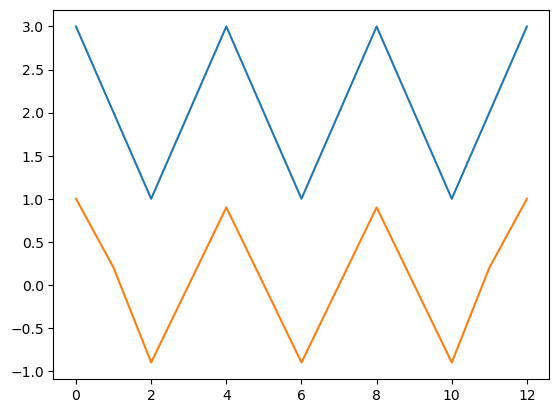

In [93]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()
ts1 = SSA_group(A, U, V, len(ts), [0, 2])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()
ts1 = SSA_group(A, U, V, len(ts), [1, 2])
print(ts1)
plt.plot(ts)
plt.plot(ts1)
plt.show()

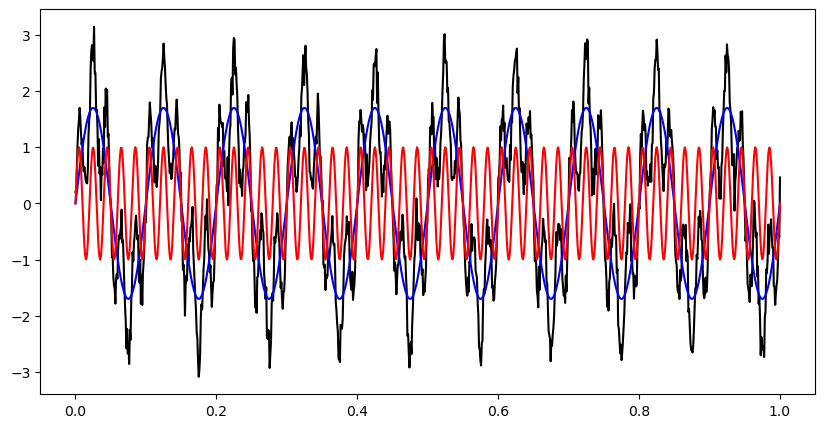

In [94]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

In [96]:
A, U, V = SSA_modes(F, 5)
ts1 = SSA_group(A, U, V, len(F), [0, 1, 2, 3])

In [98]:
print(ts1)

[0.2, 0.3, 0.7, 1.0, 1.3, 1.5, 1.7, 1.5, 1.3, 1.1, 1.1, 0.7, 0.6, 0.6, 0.5, 0.4, 0.3, 0.4, 0.7, 1.2, 1.5, 1.7, 2.3, 2.7, 2.8, 2.8, 2.6, 3.0, 2.4, 2.3, 1.7, 1.6, 1.3, 0.8, 1.1, 0.5, 0.7, 0.1, 0.6, 0.4, 1.0, 0.8, 1.7, 1.4, 2.1, 1.6, 2.0, 1.2, 1.2, 0.6, 0.2, -0.0, -0.3, -0.9, -1.0, -1.3, -1.5, -1.6, -1.7, -1.4, -1.3, -1.2, -0.8, -0.6, -0.6, -0.5, -0.4, -0.2, -0.6, -0.7, -1.1, -1.4, -1.9, -2.1, -2.5, -2.3, -2.7, -2.5, -2.8, -2.3, -2.4, -1.7, -1.5, -0.9, -1.0, -0.7, -0.6, -0.3, -0.3, -0.4, -0.6, -0.7, -1.2, -1.4, -1.1, -1.7, -1.3, -1.8, -1.3, -1.1, -0.7, -0.3, -0.3, 0.1, 0.9, 1.1, 1.3, 1.5, 1.8, 1.6, 1.4, 1.1, 1.0, 1.0, 0.6, 0.5, 0.6, 0.5, 0.3, 0.5, 0.8, 1.2, 1.4, 1.7, 2.2, 2.3, 2.5, 2.6, 2.8, 2.6, 2.4, 2.1, 1.9, 1.7, 1.3, 1.0, 0.7, 0.6, 0.6, 0.5, 0.5, 0.6, 0.9, 1.1, 1.3, 1.4, 1.7, 1.8, 1.6, 1.3, 1.1, 0.9, 0.3, 0.5, -0.3, -0.4, -1.1, -1.1, -1.4, -1.8, -1.5, -1.3, -1.3, -0.8, -1.0, -0.6, -0.7, -0.4, -0.4, -0.3, -0.2, -0.8, -1.1, -1.4, -1.7, -1.9, -2.2, -2.4, -2.8, -3.1, -3.0, -2.7, -2.1, -1.